In [40]:
"""IMPORT EVERYTHING.. """
# Data manipulation
import pandas as pd
import numpy as np

# Quantitative analysis / indicators
import talib
import backtrader as bt

# # Machine learning / statistics
# import scipy
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

# # Visualization
# import matplotlib.pyplot as plt
# import seaborn as sns
import mplfinance as mpf

# # Jupyter Notebook magic for inline plots
# %matplotlib inline


In [41]:
df = pd.read_parquet("../Src/filtered.XAUUSD-M1.parquet", engine="pyarrow")

# print(df.head(3))

In [42]:
df['RSI_14'] = talib.RSI(df['CLOSE'], timeperiod=14)


In [43]:
from resampler import OHLCVResampler

# Resample to 1 hour - all columns preserved
resampler = OHLCVResampler(default_agg='last')
result = resampler.resample(df, '5min', '2024-11-01', '2024-11-02')

print(f"\nResampled shape: {result.shape}")
print(result)


Resampled shape: (252, 6)
                         OPEN      HIGH       LOW     CLOSE  VOL     RSI_14
DATETIME                                                                   
2024-11-01 00:00:00  2746.672  2747.219  2745.759  2747.130  402  56.390544
2024-11-01 00:05:00  2747.153  2747.341  2746.124  2746.402  316  45.216472
2024-11-01 00:10:00  2746.443  2747.122  2746.336  2746.802  323  50.659996
2024-11-01 00:15:00  2746.843  2747.025  2745.862  2746.382  348  44.483869
2024-11-01 00:20:00  2746.427  2747.290  2746.188  2746.825  342  52.404853
...                       ...       ...       ...       ...  ...        ...
2024-11-01 20:35:00  2734.556  2734.830  2733.974  2734.536  323  56.895649
2024-11-01 20:40:00  2734.548  2735.017  2734.404  2734.518  292  53.464776
2024-11-01 20:45:00  2734.559  2734.912  2734.401  2734.642  276  54.736802
2024-11-01 20:50:00  2734.645  2735.558  2734.374  2735.256  371  62.680417
2024-11-01 20:55:00  2735.217  2736.856  2735.090  2736.690  

In [44]:

from ChartterX5 import Chartter

chartter = Chartter(config={
    'chart_type': 'candle',
    'style': 'charles',
    'volume': False
})
result.rename(columns={
    'OPEN': 'open',
    'HIGH': 'high',
    'LOW': 'low',
    'CLOSE': 'close',
    'VOL': 'volume'
}, inplace=True)

chartter._setup_tradingview_theme()

cnf = {
        'title': 'NONE',
        'style': chartter.tradingview_style,
        'volume': False,
        'show_nontrading': False,
        'datetime_format': '%Y-%m-%d',
        'xlabel': '',
        'ylabel': '',
        'xrotation': 0
    }
# result.head(3)

2025-10-09 19:58:38,566 [INFO] Generating chart 2b19c30a-0a61-4b64-87c5-bc046e4fbf40 with 252 data points
2025-10-09 19:58:39,221 [INFO] Chart 2b19c30a-0a61-4b64-87c5-bc046e4fbf40 generated successfully in 0.66s


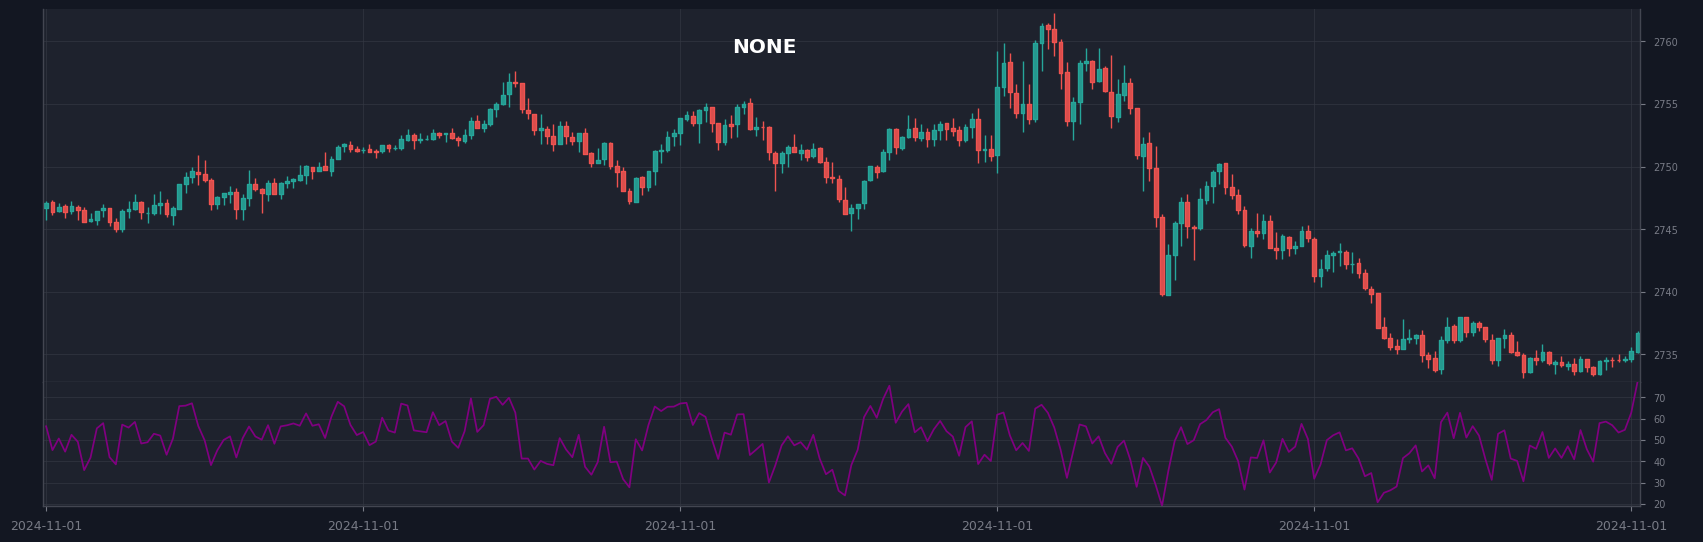

In [45]:
# Create base chart
fig, axes =chartter.plot(
    result,
    addplot=[
        mpf.make_addplot(result['RSI_14'], panel=1, color='purple', ylabel='RSI')
    ],
    config=cnf,
    returnfig=True
)